In [4]:
from lrgsglib.core import *

In [5]:
def spin_overlap(S1, S2):
     # Ensure both matrices have the same shape
     assert S1.shape == S2.shape, "Matrices must have the same shape!"

     # Direct overlap
     direct_overlap = np.sum(S1 * S2) / S1.size

     # Flipped overlap (inverted spins)
     flipped_overlap = np.sum(S1 * (-S2)) / S1.size

     # Return the maximum overlap, accounting for possible inversion
     return max(direct_overlap, flipped_overlap)

def matrix_projection(M, basis):
     projections = []

     # Iterate over each basis matrix
     for B_i in basis:
         # Compute the inner product between M and B_i
         inner_product = np.sum(M * B_i)

         # Compute the Frobenius norm of the basis matrix B_i
         norm_Bi = np.linalg.norm(B_i)

         # Compute the projection (normalized inner product)
         projection_i = inner_product / norm_Bi

         # Append the projection to the result list
         projections.append(projection_i)

     return projections
def reconstruct_from_projections(projections, basis):
     # Initialize the reconstructed matrix as zero
     reconstructed_matrix = np.zeros_like(basis[0])

     # Multiply each projection by its corresponding basis matrix and sum
     for i, B_i in enumerate(basis):
         reconstructed_matrix += projections[i] * B_i

     return reconstructed_matrix
def elements_within_eta_numpy(array, eta):
    """
    Returns elements in the array that are within eta from the minimum value.
    
    Parameters:
    - array (array-like): Input array of numerical values.
    - eta (float): Threshold value.
    
    Returns:
    - filtered_elements (np.ndarray): Elements within eta from the minimum.
    """
    array = np.array(array)  # Ensure input is a NumPy array
    min_val = np.min(array)
    displacement = array - min_val
    mask = displacement <= eta
    filtered_elements = array[mask]
    return filtered_elements

In [118]:
T = 0.0
geo = 'sqr'
pflip = 0
remove_files = False

In [137]:
l = Lattice2D(64, pflip=pflip, geo=geo)
l.flip_random_fract_edges()
l.compute_k_eigvV(with_routine='numpy')

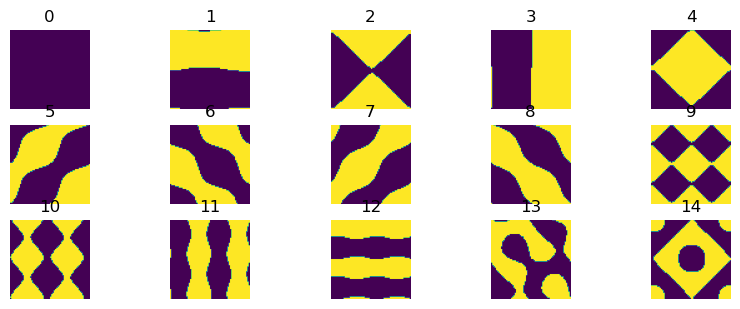

In [138]:
fig, ax = plt.subplots(3, 5, figsize=(10, 3.5))
count = 0
for i in range(3):
    for j in range(5):
        ax[i, j].imshow(l.get_eigV_bin_check(count).reshape(*l.syshape), origin='lower')
        ax[i, j].axis('off')
        ax[i, j].set_title(f'{count}')
        count += 1

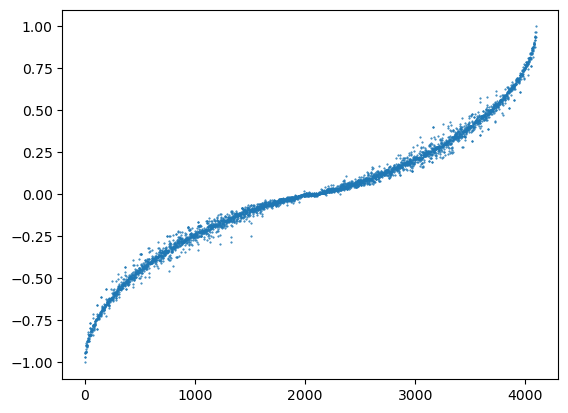

In [139]:
test_ene = [l.get_rbim_energy_eigV(_)/(2*l.N) for _ in range(l.N)]
plt.plot(test_ene, 'o', ms=0.5)

In [140]:
isdy = IsingDynamics(l, T=T, ic='ground_state_0', runlang='C3', rndStr=True)
isdy.init_ising_dynamics()
l.export_edgel_bin(exName=isdy.id_string_isingdyn)
isdy.export_ising_clust()
isdy.run(verbose=False, thrmSTEP=200)
if remove_files:
    isdy.remove_run_c_files(remove_stderr=True)
    l.remove_edgl_file()

In [136]:
4096*3000

12288000

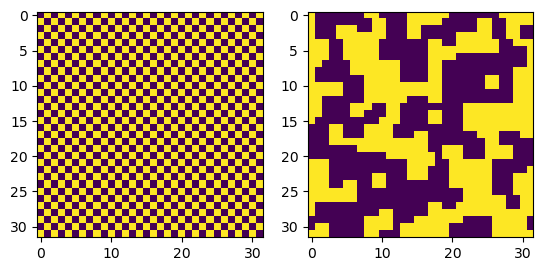

In [130]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(l.get_eigV_bin_check(1023).reshape(*l.syshape))
ax[1].imshow(isdy.s.reshape(*l.syshape))

In [116]:
np.exp(-1/0.1), 1/4096

(4.5399929762484854e-05, 0.000244140625)

In [95]:
ene = np.fromfile(l.isingpath /Path('ene_p=0_T=0_.bin'), dtype=np.float64)

In [96]:
l.get_rbim_energy_eigV(2048)/(2*l.N)

-0.0

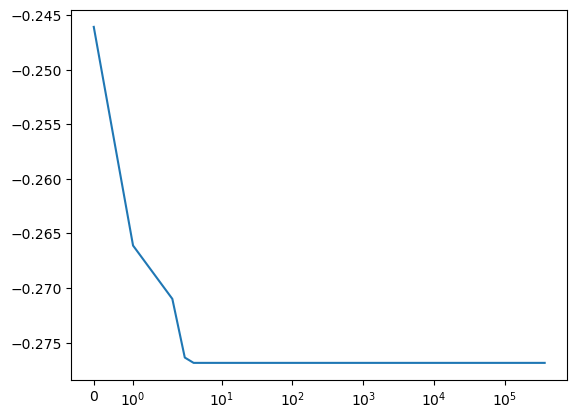

In [97]:
plt.plot(ene/(4))
# plt.yscale('symlog')
plt.xscale('symlog')

(-0.5, 63.5, -0.5, 63.5)

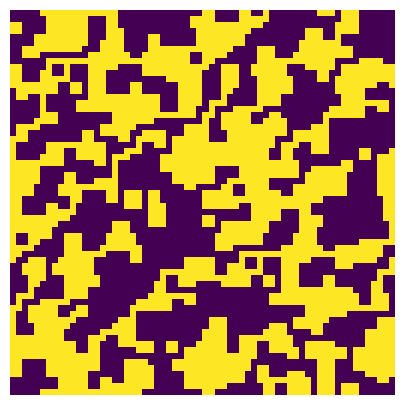

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(isdy.s.reshape(*l.syshape), origin='lower')
ax.axis('off')

In [2]:
overlap = np.array([spin_overlap(isdy.s.reshape(*l.syshape),l.get_eigV_bin_check(i).reshape(*l.syshape)) for i in range(l.N)])
sorted_args = np.argsort(overlap)[::-1]
matproj = isdy.s.reshape(*l.syshape)
basis = np.array([l.eigV[i].reshape(*l.syshape) for i in sorted_args[:500]])
projections = np.array(matrix_projection(matproj, basis))

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 5))
for i in range(3):
    ax[i].imshow(-l.get_eigV_bin_check(sorted_args[i]).reshape(*l.syshape), origin='lower')
    ax[i].axis('off')
    ax[i].set_title(f'{sorted_args[i]}')
ax[3].imshow(isdy.s.reshape(*l.syshape), origin='lower')
ax[3].axis('off')
ax[4].imshow(np.sign(reconstruct_from_projections(projections, basis)), origin='lower')
ax[4].axis('off')

In [ ]:
spin_overlap(isdy.s.reshape(*l.syshape), np.sign(reconstruct_from_projections(projections, basis)))